In [1]:
# Databasee + statistics

#from opxrd import OpXRD

#opxrd = OpXRD.load(root_dirpath='/tmp/opxrd')
#opxrd.plot_quantity(attr='primary_phase.spacegroup')
#pattern = opxrd.patterns[0]

import sys

stdout = sys.stdout
from xrdpattern.pattern import XrdPattern

p1fpath = '/home/daniel/aimat/data/opXRD/final/siol_wieczorek_0/pattern_0.json'
p2fpath = '/home/daniel/aimat/data/opXRD/final/siol_wieczorek_0/pattern_1.json'
p1 = XrdPattern.load(fpath=p1fpath)
p2 = XrdPattern.load(fpath=p2fpath)  

sys.stdout = stdout

--- Successfully processed file ---
Data file path: /home/daniel/aimat/data/opXRD/final/siol_wieczorek_0/pattern_0.json
Num errors: 0

--- Successfully processed file ---
Data file path: /home/daniel/aimat/data/opXRD/final/siol_wieczorek_0/pattern_1.json
Num errors: 0


In [1]:
from opxrd import OpXRD

opxrd = OpXRD.load(root_dirpath='/home/daniel/aimat/data/opXRD/final/coudert_hardiagon_0')

  2% (27 of 1052) |                      | Elapsed Time: 0:00:00 ETA:   0:00:05

- Loading patterns from local files


100% (1052 of 1052) |####################| Elapsed Time: 0:00:05 Time:  0:00:050000


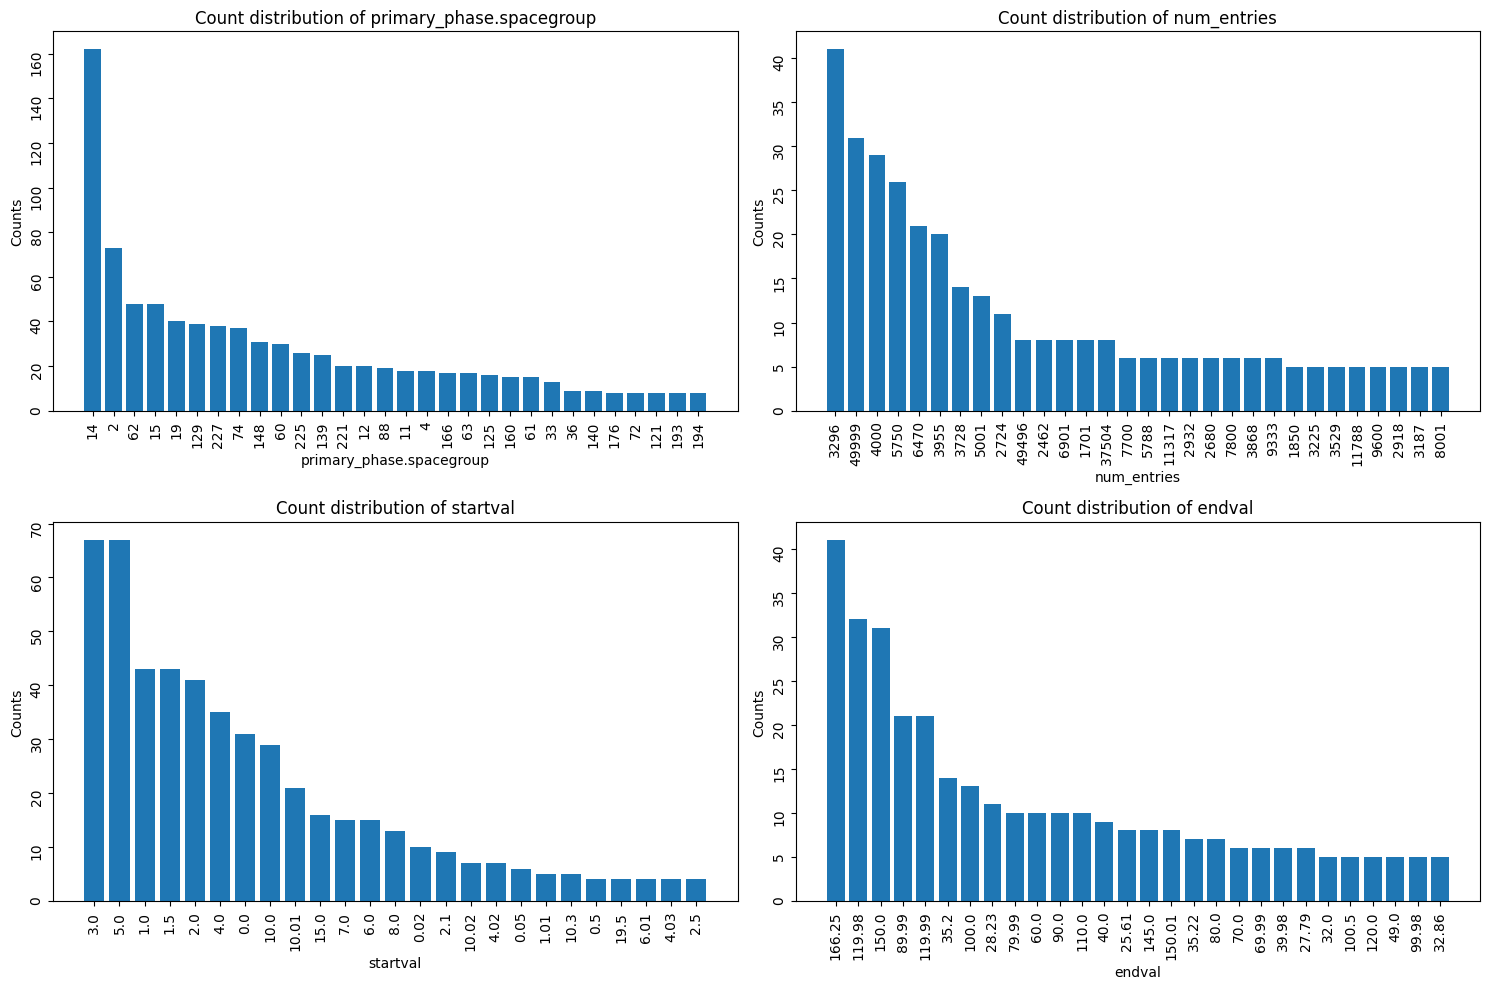

In [3]:
attrs = ['primary_phase.spacegroup', 'num_entries', 'startval', 'endval']
opxrd.plot_quantity(attrs=attrs, save_fpath='/tmp/quantities_hist.png')


In [ ]:
#Standardize

x1,y1, = p1.get_pattern_data(apply_standardization=True)
print(f'Minimum value of y = {min(y1)}')
print(f'Two theta values start, end at {x1[0]}, {x1[-1]}')

In [ ]:
# Plot
p1.plot(title='Raw pattern 1', apply_standardization=False)
p1.plot(title='Standardized pattern 1', apply_standardization=True)

In [ ]:
# Plot
p2.plot(title='Raw pattern 2', apply_standardization=False)
p2.plot(title='Standardized pattern 2', apply_standardization=True)

In [ ]:
# To tensor
#import torch
#pattern.to_tensorpair(dtype=torch.float32, device=torch.device('cuda'))

In [ ]:
import matplotlib.pyplot as plt
from xrdpattern.pattern import PatternDB
from sklearn.decomposition import PCA
import numpy as np

def plot_pattern_dbs(dbs : list[PatternDB]):
    combined_y_list = []
    for db in dbs:
        patterns = db.patterns
        xy_list = [p.get_pattern_data() for p in patterns]
        y_list = [y for x,y in xy_list]
        combined_y_list.extend(y_list)
        
    pca = PCA(n_components=2)
    transformed_data = pca.fit_transform(combined_y_list)
    
    db_lens = [len(db.patterns) for db in dbs]
    max_points = 50
    for j, l in enumerate(db_lens):
        partial = transformed_data[:l]
        if l > max_points:
            indices = np.random.choice(len(partial), size=max_points, replace=False)
            partial = partial[indices]
        plt.scatter(partial[:, 0], partial[:, 1], label=f'db number {j}')
        
        transformed_data = transformed_data[l:]
        
    plt.title('Two Component PCA Scatter Plot')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.show()



In [ ]:
cod_db = PatternDB.load(dirpath='/home/daniel/aimat/data/opXRD/final/coudert_hardiagon_0')
usc_db = PatternDB.load(dirpath='/home/daniel/aimat/data/opXRD/final/hodge_alwen_0')
usc_db_two = PatternDB.load(dirpath='/home/daniel/aimat/data/opXRD/final/hodge_alwen_1')
int_db = PatternDB.load(dirpath='/home/daniel/aimat/data/opXRD/final/breitung_schweidler_0')
cao_db = PatternDB.load(dirpath='/home/daniel/aimat/data/opXRD/final/zhang_cao_0')

plot_pattern_dbs(dbs=[usc_db, usc_db_two, int_db, cao_db])